Task 01

In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving diabetes.csv to diabetes.csv


In [3]:
df = pd.read_csv('/content/diabetes.csv')

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Task 02

In [6]:
diabetic_patients = df[df['Outcome'] == 1]

In [8]:
median_bp = diabetic_patients['BloodPressure'].median()
print (f"Median pressure for diabetic patients: {median_bp}")

Median pressure for diabetic patients: 74.0


Task 03

In [10]:
target_variable = 'Outcome'

class_distribution = df[target_variable].value_counts()
print(class_distribution)

Outcome
0    500
1    268
Name: count, dtype: int64


Task 04

In [11]:
# Separate features (X) and target (Y)
X = df.drop(columns=[target_variable])
y = df[target_variable]

Task 05

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (614, 8)
Testing set shape: (154, 8)


Task 06

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1, stratify=y)

# Check the shape of the splits
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Training set shape: (576, 8)
Testing set shape: (192, 8)


Task 07

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Initialize the classifier
dt = DecisionTreeClassifier(random_state=1)

# Fit the model to the training data
dt.fit(X_train, y_train)

# Predict on the test data
y_pred = dt.predict(X_test)

# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Decision Tree Accuracy: {accuracy:.2f}")

Decision Tree Accuracy: 0.72


Task 08

In [15]:
train_accuracy = accuracy_score(y_train, dt.predict(X_train))
print(f"Training Accuracy: {train_accuracy:.2f}")

# Compare with test accuracy
print(f"Test Accuracy: {accuracy:.2f}")

Training Accuracy: 1.00
Test Accuracy: 0.72


Task 09

In [ ]:
from sklearn.metrics import classification_report

# Generate the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Task 10

In [ ]:
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Calculate false positive rate
false_positives = cm[0, 1]
total_negatives = cm[0, 0] + cm[0, 1]
false_positive_rate = false_positives / total_negatives
print(f"False Positive Rate: {false_positive_rate:.2f}")

Task 11

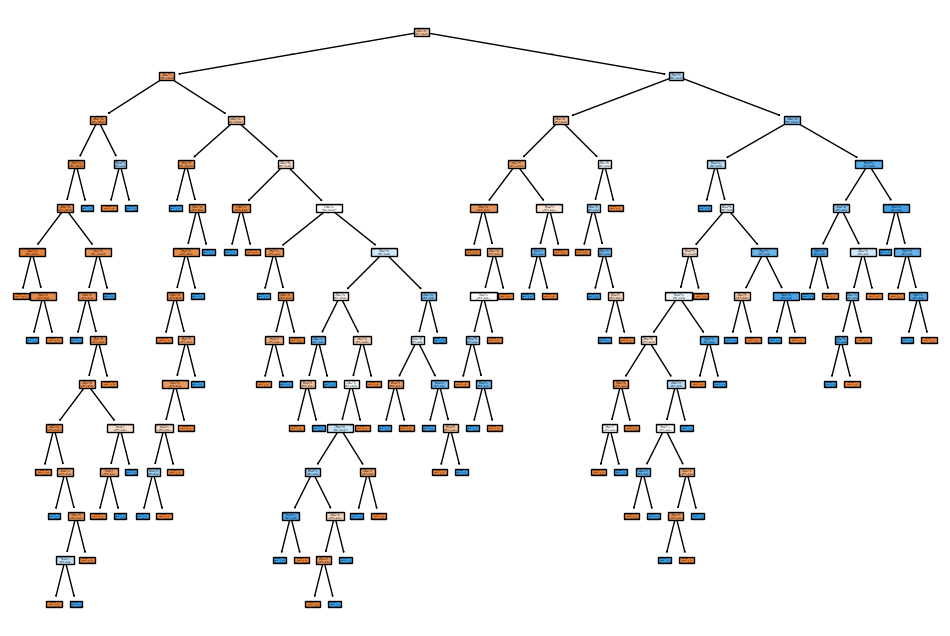

In [16]:
from sklearn import tree
import matplotlib.pyplot as plt

# Plot the decision tree
plt.figure(figsize=(12, 8))
tree.plot_tree(dt, filled=True, feature_names=X.columns, class_names=['No Diabetes', 'Diabetes'])
plt.show()

Task 12

In [17]:
importances = dt.feature_importances_

# Create a DataFrame to display feature importance
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print ("Feature Importance:\n", feature_importance)

Feature Importance:
                     Feature  Importance
1                   Glucose    0.331583
5                       BMI    0.169211
6  DiabetesPedigreeFunction    0.138457
7                       Age    0.117953
2             BloodPressure    0.108247
0               Pregnancies    0.050755
4                   Insulin    0.044033
3             SkinThickness    0.039761


Task 13

In [18]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=4)

knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn:.2f}")

print(f"Decision Tree Accuracy: {accuracy:.2f}")

KNN Accuracy: 0.67
Decision Tree Accuracy: 0.72


Task 14

In [29]:
df_weather = pd.read_csv('/content/pm25_2016_2020_v3.csv')

In [30]:
df_weather.head()

,aqs_id,date_local,latitude_x,longitude_x,elevation,dominant_source,measurement_scale,monitoring_objective,tavg,tmin,...,meth_type_b,method_code_a,method_code_b,monitor_type_a,monitor_type_b,month,year,DayOfWeek,coord,states
0,20-177-0013,2017-06-15,39.024265,-95.711275,280,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,19.554724,18.603846,...,FEM,145,236,NaN,SLAMS,June,2017,Thursday,39.024265 -95.711275,Kansas
1,20-177-0013,2017-06-18,39.024265,-95.711275,280,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,19.554724,18.603846,...,FEM,145,236,NaN,SLAMS,June,2017,Sunday,39.024265 -95.711275,Kansas
2,20-177-0013,2017-06-21,39.024265,-95.711275,280,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,19.554724,18.603846,...,FEM,145,236,NaN,SLAMS,June,2017,Wednesday,39.024265 -95.711275,Kansas
3,20-177-0013,2017-06-24,39.024265,-95.711275,280,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,19.554724,18.603846,...,FEM,145,236,NaN,SLAMS,June,2017,Saturday,39.024265 -95.711275,Kansas
4,20-177-0013,2017-06-30,39.024265,-95.711275,280,AREA,NEIGHBORHOOD,POPULATION EXPOSURE,19.554724,18.603846,...,FEM,145,236,NaN,SLAMS,June,2017,Friday,39.024265 -95.711275,Kansas


In [33]:
print(df_weather.columns)

Index(['aqs_id', 'date_local', 'latitude_x', 'longitude_x', 'elevation',
       'dominant_source', 'measurement_scale', 'monitoring_objective', 'tavg',
       'tmin', 'tmax', 'prcp', 'snow', 'wdir', 'wspd', 'wpgt', 'pres', 'tsun',
       'arithmetic_mean_a', 'arithmetic_mean_b', 'poc_a', 'poc_b',
       'meth_type_a', 'meth_type_b', 'method_code_a', 'method_code_b',
       'monitor_type_a', 'monitor_type_b', 'month', 'year', 'DayOfWeek',
       'coord', 'states'],
      dtype='object')


Task 15

In [34]:
print(df_weather[['latitude_x', 'longitude_x']].head())

   latitude_x  longitude_x
0   39.024265   -95.711275
1   39.024265   -95.711275
2   39.024265   -95.711275
3   39.024265   -95.711275
4   39.024265   -95.711275


Task 16

In [36]:
from sklearn.cluster import KMeans

# Assuming 'df_weather' contains the data for clustering:
X_weather = df_weather[['latitude_x', 'longitude_x']]  # Select relevant columns for clustering

# Perform K-Means clustering with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=1)
X_weather['Cluster'] = kmeans.fit_predict(X_weather)
X_weather['Cluster'] = X_weather['Cluster'].astype('category')

# Display the first few rows with cluster labels
X_weather.head()

<ipython-input-36-a9e8022e9fd6>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_weather['Cluster'] = kmeans.fit_predict(X_weather)
<ipython-input-36-a9e8022e9fd6>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_weather['Cluster'] = X_weather['Cluster'].astype('category')


,latitude_x,longitude_x,Cluster
0,39.024265,-95.711275,4
1,39.024265,-95.711275,4
2,39.024265,-95.711275,4
3,39.024265,-95.711275,4
4,39.024265,-95.711275,4


Task 17

In [37]:
kmeans = KMeans(n_clusters=5, random_state=1)
X_weather['Cluster'] = kmeans.fit_predict(X_weather)
X_weather['Cluster'] = X_weather['Cluster'].astype('category')

# Count observations in each cluster
cluster_counts = X_weather['Cluster'].value_counts()
print("Cluster Counts:\n", cluster_counts)

Cluster Counts:
 Cluster
2    33339
0    29932
3    24061
4    17603
1    11777
Name: count, dtype: int64


<ipython-input-37-acaade703028>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_weather['Cluster'] = kmeans.fit_predict(X_weather)
<ipython-input-37-acaade703028>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_weather['Cluster'] = X_weather['Cluster'].astype('category')


Task 18

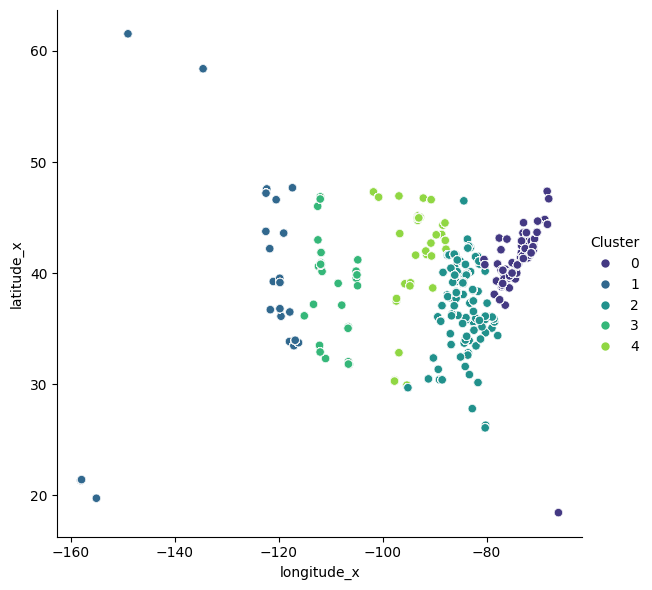

In [39]:
import seaborn as sns

# Plot the clusters, using the correct column names
sns.relplot(x='longitude_x', y='latitude_x', hue='Cluster', data=X_weather, height=6, palette='viridis')
plt.show()